In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Bring in crime csv
crime_csv = pd.read_csv('../../NYPD_Complaint_Data_Current__Year_To_Date__20250320.csv')
#create df
crime_df = pd.DataFrame(crime_csv)
#display df
crime_df.head()


C:\Users\juszi\AppData\Local\Temp\ipykernel_6268\2823328793.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_csv = pd.read_csv('../../NYPD_Complaint_Data_Current__Year_To_Date__20250320.csv')


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,296538111H1,42,BRONX,08/14/2024,19:41:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,WHITE HISPANIC,F,NaN,NaN,NaN,NaN,NaN,NaN
1,296164481,48,BRONX,02/01/2021,16:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,1011751.0,246839.0,40.844157,-73.900605,"(40.8441566000203, -73.9006054489734)",POINT (-73.9006054489734 40.8441566000203)
2,292224978,34,MANHATTAN,08/24/2024,00:38:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,UNKNOWN,F,1003658.0,250199.0,40.853392,-73.929842,"(40.853392, -73.929842)",POINT (-73.929842 40.853392)
3,298613169,116,QUEENS,12/29/2024,16:23:00,12/29/2024,16:34:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1057893.0,182156.0,NaN,NaN,NaN,NaN
4,292542564,73,BROOKLYN,08/30/2024,14:55:00,08/30/2024,15:00:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,1008245.0,183796.0,40.671130,-73.913502,"(40.6711300016904, -73.9135020552048)",POINT (-73.9135020552048 40.6711300016904)


In [3]:
#find the top crimes
crime_df['OFNS_DESC'].value_counts()

OFNS_DESC
PETIT LARCENY                       109799
HARRASSMENT 2                        85634
ASSAULT 3 & RELATED OFFENSES         62992
GRAND LARCENY                        48445
CRIMINAL MISCHIEF & RELATED OF       39600
FELONY ASSAULT                       29452
VEHICLE AND TRAFFIC LAWS             24599
MISCELLANEOUS PENAL LAW              19035
OFF. AGNST PUB ORD SENSBLTY &        18254
ROBBERY                              16574
DANGEROUS DRUGS                      15280
GRAND LARCENY OF MOTOR VEHICLE       14193
OTHER OFFENSES RELATED TO THEFT      13164
BURGLARY                             13067
SEX CRIMES                            9682
DANGEROUS WEAPONS                     9157
OFFENSES AGAINST PUBLIC ADMINI        8510
FORGERY                               7042
CRIMINAL TRESPASS                     3564
INTOXICATED & IMPAIRED DRIVING        3251
OFFENSES INVOLVING FRAUD              3038
THEFT-FRAUD                           2764
POSSESSION OF STOLEN PROPERTY         2600
F

In [4]:
#find the tonumber of crimes per borough
crimes_per_borough = crime_df['BORO_NM'].value_counts().reset_index()
crimes_per_borough

,BORO_NM,count
0,BROOKLYN,159200
1,MANHATTAN,138644
2,QUEENS,128164
3,BRONX,125671
4,STATEN ISLAND,24594
5,(null),835


In [5]:
# Group by borough and offense, then count occurrences
grouped = crime_df.groupby(['BORO_NM', 'OFNS_DESC'])
grouped = grouped.size().reset_index(name = 'Count')
grouped = grouped[(grouped['BORO_NM'] != '(null)') & (grouped['OFNS_DESC'] != '(null)')]
top_10_crimes_by_borough = grouped.sort_values(['Count','BORO_NM'], ascending=[True, False])
top_10_crimes_by_borough = top_10_crimes_by_borough.sort_values('Count', ascending= False)
top_10_crimes_by_borough.head(10)

,BORO_NM,OFNS_DESC,Count
168,MANHATTAN,PETIT LARCENY,35390
114,BROOKLYN,PETIT LARCENY,27565
94,BROOKLYN,HARRASSMENT 2,25642
218,QUEENS,PETIT LARCENY,25233
42,BRONX,HARRASSMENT 2,19082
201,QUEENS,HARRASSMENT 2,19047
148,MANHATTAN,GRAND LARCENY,17067
77,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,17013
150,MANHATTAN,HARRASSMENT 2,16952
61,BRONX,PETIT LARCENY,16777


Top crimes explained:
- Petit Larceny is the theft of property under $1,000
- Harrasment 2 occurs when someone, harasses, annoys or alarms the victim with intent to cause them distress
- Grand Larceny is the theft of property over $1,000
- Assualt 3 occurs when someone intentioanlly or recklessly causes physical injury to another person

In [28]:
#Plot the murders throughout the year 2024:
def crime_plotter(df, crime_type: str, year: int):
    the_crime = df.copy()
    the_crime = the_crime[the_crime['OFNS_DESC'] == crime_type]
    the_crime['CMPLNT_FR_DT'] = pd.to_datetime(the_crime['CMPLNT_FR_DT'])
    the_crime['Month'] = the_crime['CMPLNT_FR_DT'].dt.to_period('M')
    monthly_crime_counts = the_crime.groupby(['Month']).size()
    crime_year = monthly_crime_counts[monthly_crime_counts.index.year == year]

    return crime_year

In [37]:
#Murder 2024
murder = crime_plotter(crime_df, 'MURDER & NON-NEGL. MANSLAUGHTER', 2024)
#Vehicle Crimes for 2024
car_crime = crime_plotter(crime_df, 'GRAND LARCENY OF MOTOR VEHICLE', 2024)
#Arson 2024
arson_crime = crime_plotter(crime_df, 'ARSON', 2024)
#Robbery 2024
robbery_crime = crime_plotter(crime_df, 'ROBBERY', 2024)                            

In [81]:
# plot car crimes for 2024
def crime_plot(crime_variable, color: str = None, filename: str = None):
    crime_plots = crime_variable.plot(kind = 'bar', color = color)
    plt.savefig(filename)

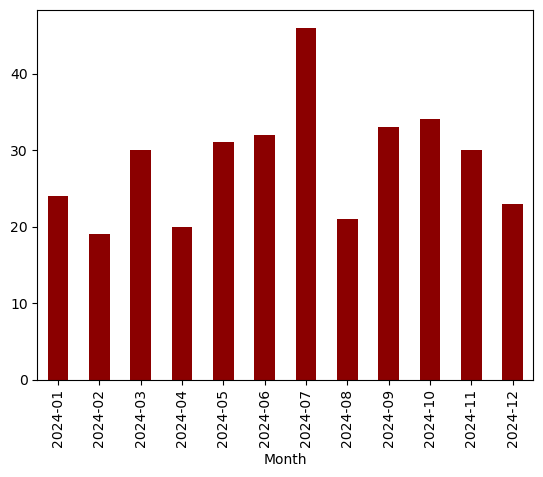

In [84]:
#plot murder 2024
murder_plot_2024 = crime_plot(murder, 'darkred', 'murder_2024')


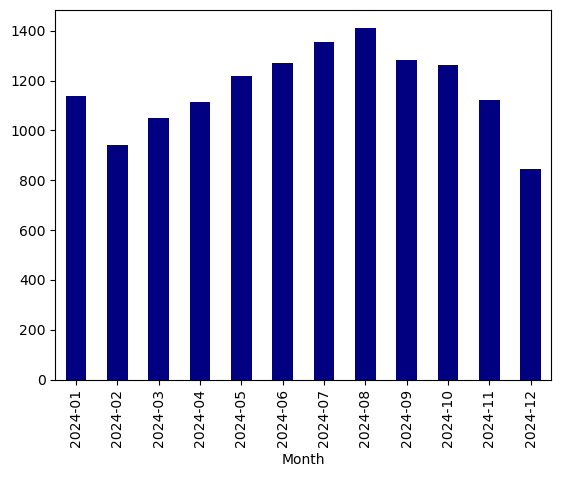

In [85]:
#Vehicle Crimes for 2024
crime_plot(car_crime, 'navy', 'car_crime_2024')

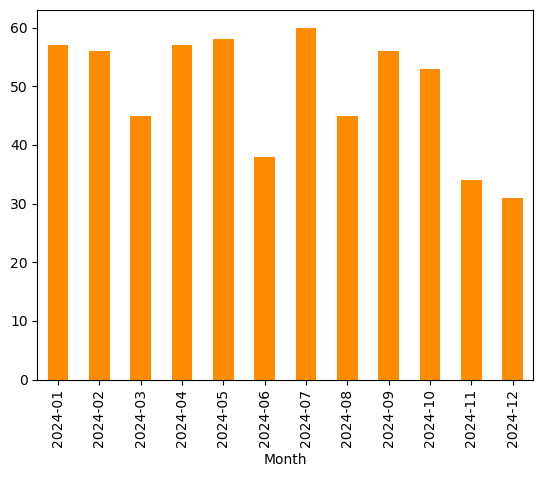

In [86]:
#Arson plot 2024
crime_plot(arson_crime, 'darkorange', 'arson_2024')

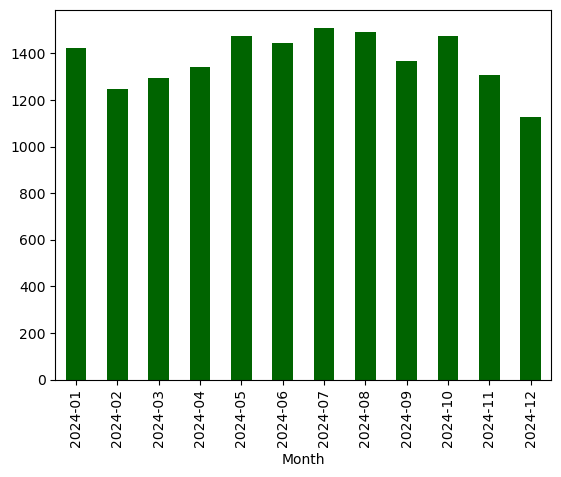

In [87]:
#Robbery 2024 plot
crime_plot(robbery_crime, 'darkgreen', 'robbery_2024')